<a href="https://colab.research.google.com/github/FurkNegz/MachineLearning/blob/main/CarPriceLinearvsLesso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
car_dataset= pd.read_csv('/content/car data.csv')


In [7]:
car_dataset.shape

(301, 9)

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#data set information
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [13]:
#check the distribution of categorical cata
print(car_dataset.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [14]:
print(car_dataset.Car_Name.value_counts())

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64


Encoding DAta

In [25]:
car_dataset.replace({'Fuel_Type':{'Petrol': 0 ,'Diesel': 1, 'CNG': 2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer': 0 ,'Individual': 1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0 ,'Automatic':1}},inplace=True)


/tmp/ipython-input-25-155527972.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0 ,'Automatic':1}},inplace=True)


In [26]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [30]:
#splitting target
x= car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']


In [31]:
print(x)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [54]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=2)

In [55]:
#loading linear reg
lin_reg= LinearRegression()

In [56]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [57]:

#model evaluation
#prediction on Training data
training_data_prediction=lin_reg.predict(x_train)

In [58]:
#r square error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.884569190486427


Text(0, 0.5, 'PredictedPrice')

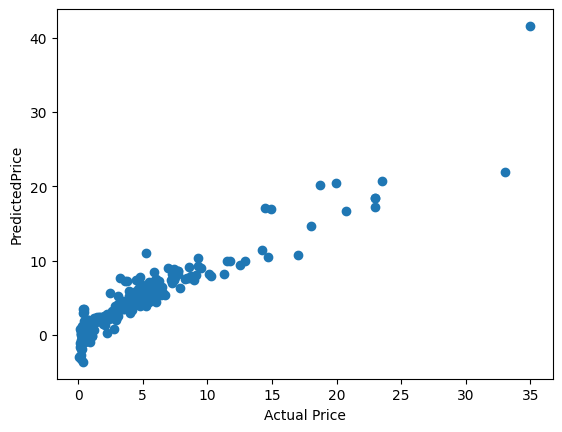

In [59]:
#visualize the actual prices and predictted
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("PredictedPrice")

In [60]:
test_data_prediction=lin_reg.predict(x_test)
error_score_test = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error:", error_score_test)

R squared Error: 0.8366282679747323


Text(0, 0.5, 'PredictedPrice')

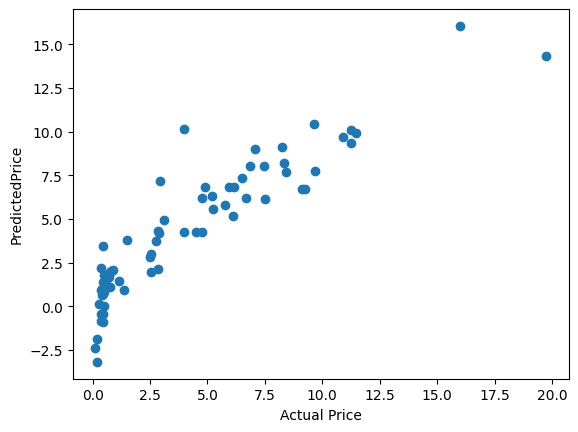

In [61]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("PredictedPrice")

Lasso Regression

In [63]:
#loading linear reg
lasso_reg= Lasso()

In [64]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [66]:

#model evaluation
#prediction on Training data
training_data_predictionLas=lasso_reg.predict(x_train)

In [67]:
#r square error
error_scoreLas = metrics.r2_score(y_train,training_data_predictionLas)
print("R squared Error:", error_scoreLas)

R squared Error: 0.8432633514889039


Text(0, 0.5, 'PredictedPrice')

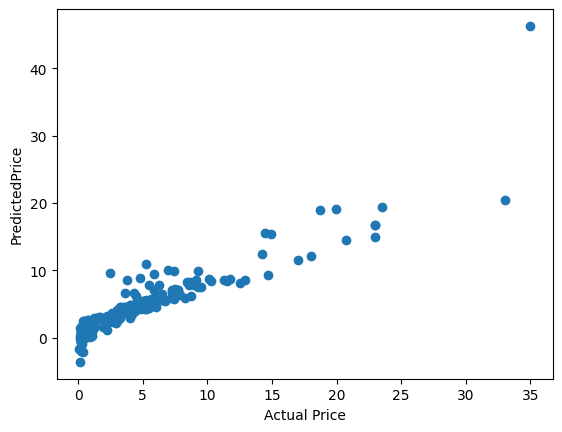

In [69]:
#visualize the actual prices and predictted
plt.scatter(y_train,training_data_predictionLas)
plt.xlabel("Actual Price")
plt.ylabel("PredictedPrice")

In [72]:
test_data_predictionLas=lasso_reg.predict(x_test)
error_score_testLas = metrics.r2_score(y_test,test_data_predictionLas)
print("R squared Error:", error_score_testLas)

R squared Error: 0.8473599545536585
